## 📦 Cell 1: Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

##  ⚙️ Cell 2: Visualization Settings

In [2]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.set(style='whitegrid', context='talk')

##  📂 Cell 3: Load the Dataset

In [ ]:
fn = '../data/togo-dapaong_qc.csv'
df = pd.read_csv(fn)
df_orig = df.copy()
df.shape, df.columns

FileNotFoundError: [Errno 2] No such file or directory: '..data/togo-dapaong_qc.csv'

## 🧹 Cell 4: Basic Cleaning

In [4]:

df = df.drop_duplicates()


df = df.dropna(axis=1, how='all')

df.columns = df.columns.str.lower().str.strip()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp      525600 non-null  object 
 1   ghi            525600 non-null  float64
 2   dni            525600 non-null  float64
 3   dhi            525600 non-null  float64
 4   moda           525600 non-null  float64
 5   modb           525600 non-null  float64
 6   tamb           525600 non-null  float64
 7   rh             525600 non-null  float64
 8   ws             525600 non-null  float64
 9   wsgust         525600 non-null  float64
 10  wsstdev        525600 non-null  float64
 11  wd             525600 non-null  float64
 12  wdstdev        525600 non-null  float64
 13  bp             525600 non-null  int64  
 14  cleaning       525600 non-null  int64  
 15  precipitation  525600 non-null  float64
 16  tmoda          525600 non-null  float64
 17  tmodb          525600 non-nul

##  📊 Cell 5: Summary Statistics

In [5]:
df.describe(include='all').T

count  unique               top freq        mean  \
timestamp        525600  525600  2021-10-30 00:01    1         NaN   
ghi            525600.0     NaN               NaN  NaN  201.957515   
dni            525600.0     NaN               NaN  NaN  116.376337   
dhi            525600.0     NaN               NaN  NaN  113.720571   
moda           525600.0     NaN               NaN  NaN  206.643095   
modb           525600.0     NaN               NaN  NaN  198.114691   
tamb           525600.0     NaN               NaN  NaN   26.319394   
rh             525600.0     NaN               NaN  NaN   79.448857   
ws             525600.0     NaN               NaN  NaN    1.146113   
wsgust         525600.0     NaN               NaN  NaN    1.691606   
wsstdev        525600.0     NaN               NaN  NaN    0.363823   
wd             525600.0     NaN               NaN  NaN  133.044668   
wdstdev        525600.0     NaN               NaN  NaN     7.17222   
bp             525600.0     NaN               NaN  NaN  999.876469   
cleaning       525600.0     NaN               NaN  NaN    0.000967   
precipitation  525600.0     NaN               NaN  NaN    0.004806   
tmoda          525600.0     NaN               NaN  NaN   32.504263   
tmodb          525600.0     NaN               NaN  NaN   32.593091   

                      std    min    25%     50%     75%     max  
timestamp             NaN    NaN    NaN     NaN     NaN     NaN  
ghi             298.49515  -19.5   -2.8     0.3   362.4  1499.0  
dni            218.652659   -7.8   -0.3    -0.1   107.0   946.0  
dhi            158.946032  -17.9   -3.8    -0.1   224.7   892.0  
moda           300.896893    0.0    0.0     3.6   359.5  1507.0  
modb           288.889073    0.0    0.0     3.4   345.4  1473.0  
tamb             4.398605   12.3   23.1    25.3    29.4    39.9  
rh              20.520775    9.9   68.7    85.4    96.7   100.0  
ws               1.239248    0.0    0.0     0.8     2.0    19.2  
wsgust           1.617053    0.0    0.0     1.6     2.6    23.9  
wsstdev             0.295    0.0    0.0     0.4     0.6     4.1  
wd             114.284792    0.0    0.0   161.5   234.1   360.0  
wdstdev          7.535093    0.0    0.0     6.2    12.0    98.4  
bp               2.104419  993.0  999.0  1000.0  1001.0  1006.0  
cleaning         0.031074    0.0    0.0     0.0     0.0     1.0  
precipitation    0.047556    0.0    0.0     0.0     0.0     2.4  
tmoda           12.434899   10.7   23.5    26.6    40.9    72.8  
tmodb           12.009161   11.1   23.8    26.9    41.3    70.4

## 🔍 Cell 6: Missing Value Report

In [6]:
missing = df.isna().sum()
missing_values = missing[missing > 0].sort_values(ascending=False)
print(missing_values)


Series([], dtype: int64)


## 🧮 Cell 7: Fill or Handle Missing Values (Example)

In [7]:

num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(exclude=np.number).columns
mode_dict = {col: df[col].mode()[0] for col in cat_cols}
df[cat_cols] = df[cat_cols].fillna(mode_dict)

## 📈 Cell 8: Distribution of Numeric Features

In [8]:
df.hist(bins=30, figsize=(14, 12))
plt.suptitle('Numeric Feature Distributions', fontsize=18, y=0.95)
plt.tight_layout(pad=3.0)  # Increased padding between subplots
plt.subplots_adjust(top=0.9)  # Add space for the main title
plt.show()

## Numeric Feature Distributions – Interpretation

- The histograms provide a visual overview of the distribution patterns for multiple numeric features in the dataset.
- Each plot displays the frequency of values across defined ranges, helping to identify central tendencies, spread, and skewness.
- This analysis supports data preprocessing decisions such as normalization, transformation, and outlier handling.

### **General Observations**:
- Solar irradiance features (GHI, DNI, DHI) show wide distributions with varying degrees of skewness, reflecting natural fluctuations in sunlight.
- Temperature-related features (MODA, MODB, TAMB, TMODB) are moderately spread, with peaks indicating common operating conditions and tails suggesting heat extremes.
- Humidity (RH) and barometric pressure (BP) exhibit relatively stable distributions, useful for modeling consistent environmental conditions.
- Wind-related features (WS, WSGUST, WSSTDDEV, WD, WDSTDDEV) show diverse patterns, with some skewed and others uniformly distributed, indicating variability in wind behavior.
- Precipitation and Cleaning are sparse and event-driven, often showing binary or low-frequency distributions.

## 📉 Cell 9: Correlation Heatmap

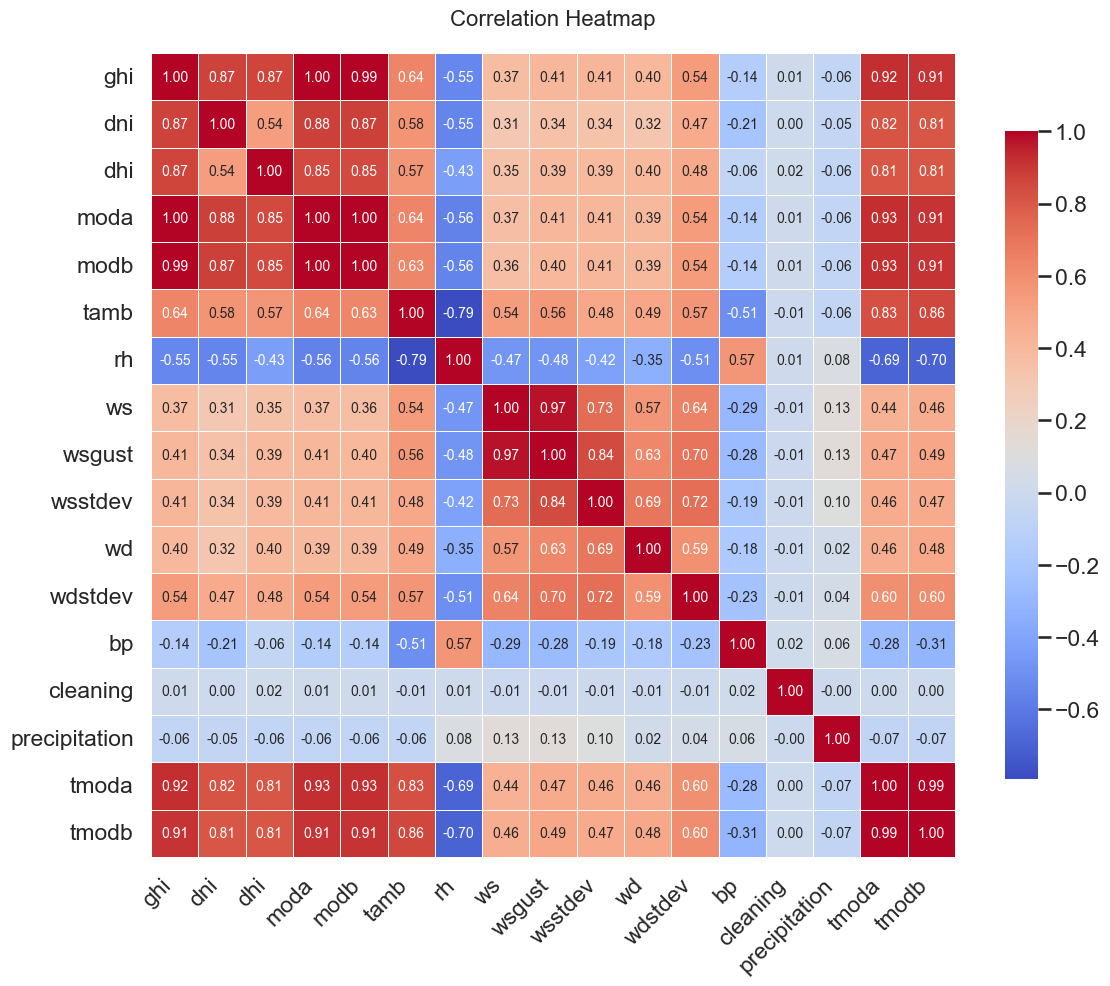

In [9]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5,
            fmt='.2f', 
            annot_kws={'size': 10}, 
            square=True,  
            cbar_kws={'shrink': 0.8})  

plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Correlation Matrix – Interpretation

- The matrix displays pairwise correlation coefficients between selected numeric variables, ranging from -1.00 (strong negative correlation) to 1.00 (strong positive correlation).
- Color gradients represent the strength and direction of relationships: blue for positive, red for negative, and white for weak or no correlation.
- Each cell quantifies how changes in one variable are associated with changes in another.

### **General Observations**:
- MODA, MODB, TAMB, and TMODA/TMODB show strong positive correlations with each other, indicating shared thermal behavior influenced by environmental conditions.
- DHI correlates moderately with temperature features, suggesting diffuse irradiance contributes to heat accumulation.
- Wind-related features (WGSUT, WSSTDDEV, WSTDDEV) exhibit weak correlations with temperature and irradiance, reflecting independent variability.
- Cleaning and Precipitation show minimal correlation with most variables, implying sporadic or event-driven occurrences.

## 📊 Cell 10: Pairplot (sample for numeric columns)

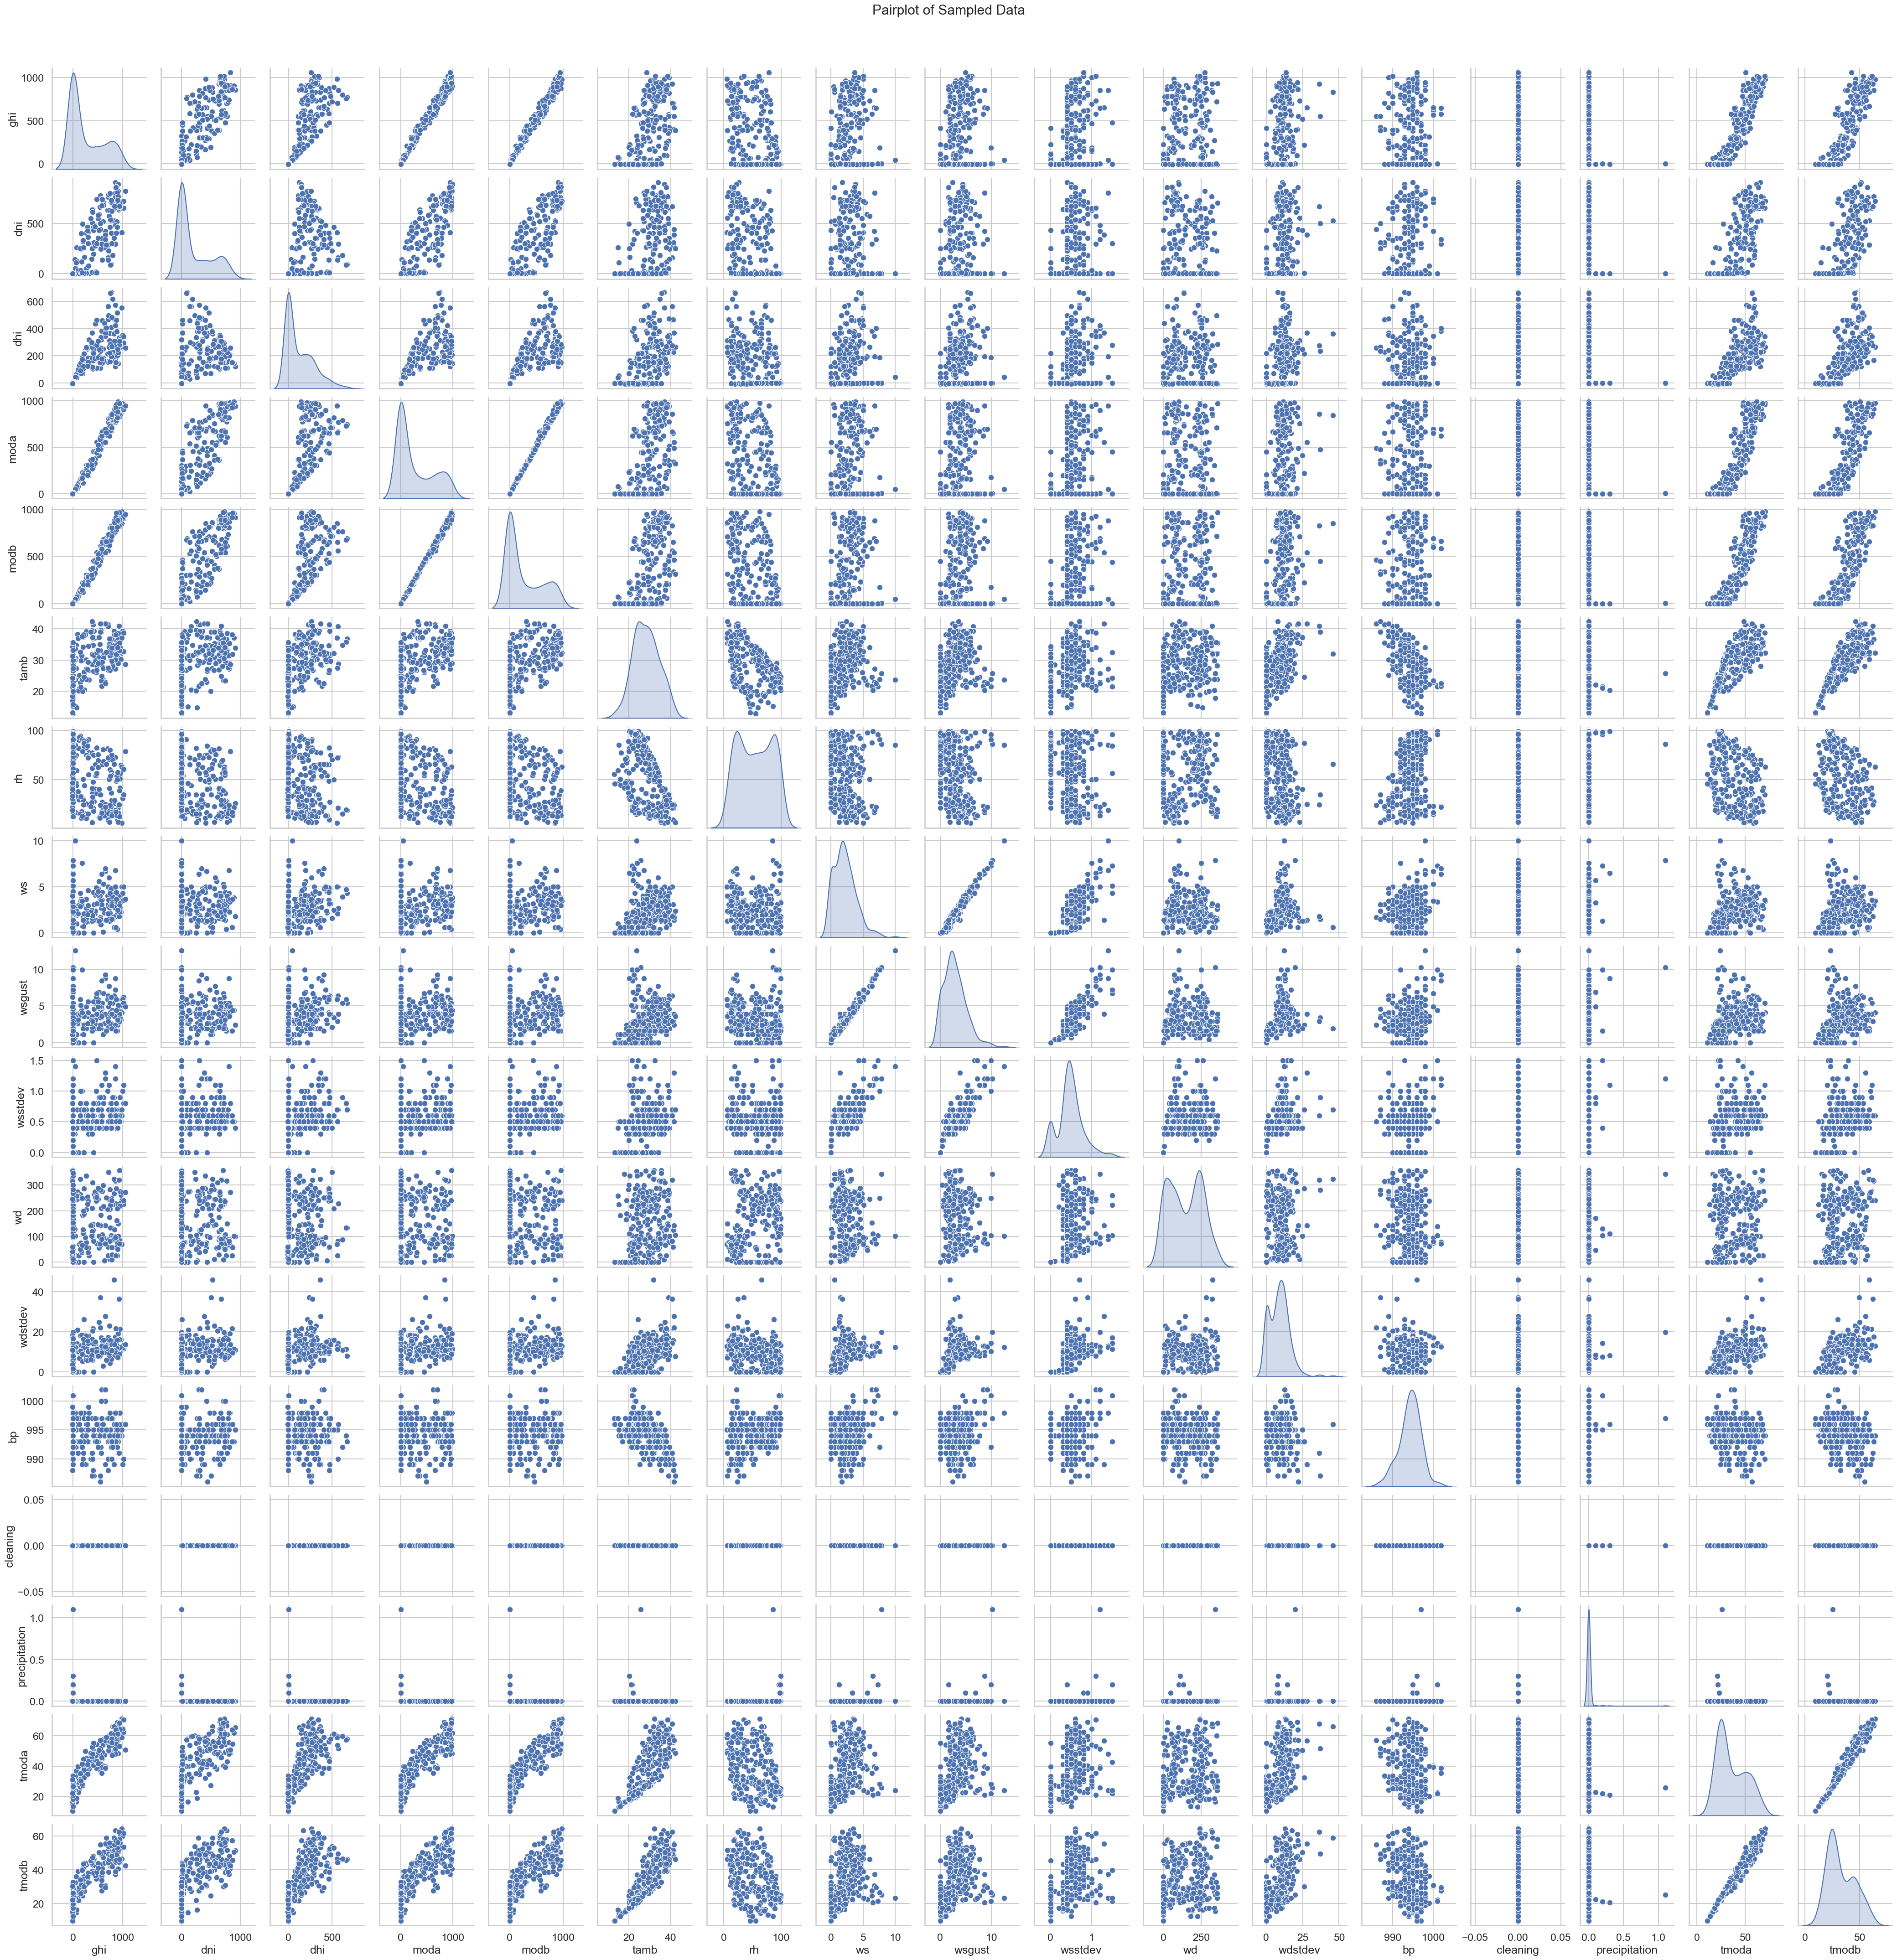

In [24]:
sns.pairplot(df.sample(min(300, len(df))), diag_kind='kde')
plt.suptitle('Pairplot of Sampled Data', y=1.02)
plt.show()

## 📦 Cell 11: Outlier Detection (Z-score method)

In [25]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
outliers = (z_scores > 3).sum().sum()
print(f"Total outlier values: {outliers}")

Total outlier values: 23804


## 🧭 Cell 12: Remove Extreme Outliers (optional)

In [26]:
df = df[(z_scores < 3).all(axis=1)]
print(f"After outlier removal: {df.shape}")

After outlier removal: (507757, 18)


## 📆 Cell 13: Convert Date Columns 

In [27]:
for col in df.columns:
    if 'date' in col or 'time' in col:
        df[col] = pd.to_datetime(df[col], errors='coerce')

## 📉 Cell 14: Time Series Plot (if applicable)

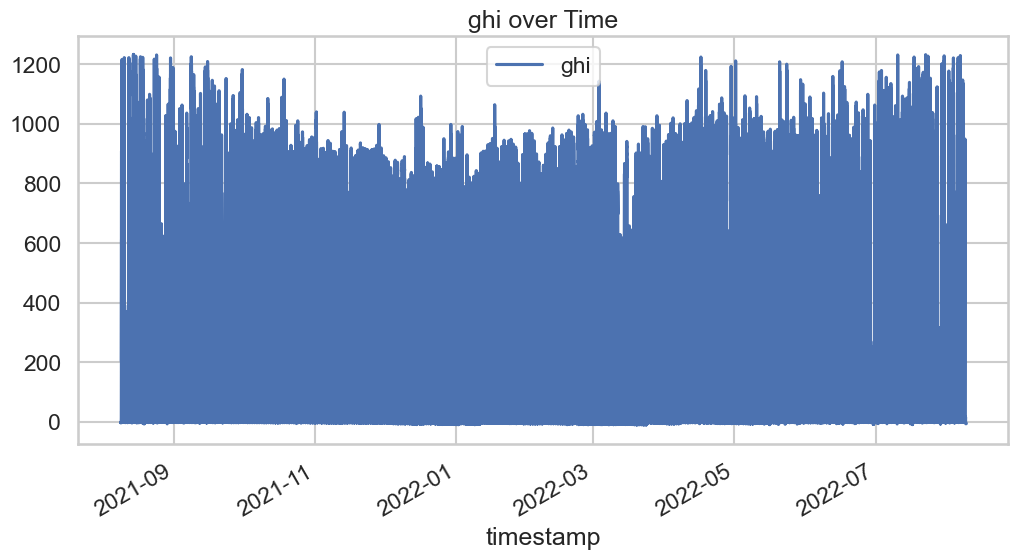

In [28]:
time_cols = [c for c in df.columns if 'date' in c or 'time' in c]
if len(time_cols) > 0:
    col = time_cols[0]
    num_col = df.select_dtypes(include=np.number).columns[0]
    df.plot(x=col, y=num_col, title=f"{num_col} over Time")
    plt.show()

## Time Series Plot – Interpretation

- The plot visualizes the variation of Global Horizontal Irradiance (GHI) over time.
- The x-axis represents timestamps, indicating the temporal progression of data collection.
- The y-axis shows GHI values, ranging approximately from 0 to 1400 W/m².
- The data exhibits frequent fluctuations, reflecting changes in solar irradiance due to factors such as cloud cover, time of day, and atmospheric conditions.
- Peaks in the graph correspond to periods of high solar exposure, while troughs indicate reduced irradiance.

This time series analysis helps in understanding daily and seasonal patterns of solar energy availability, which is essential for forecasting and optimizing photovoltaic system performance.

## 📊 Cell 15: Boxplots for Numeric Columns

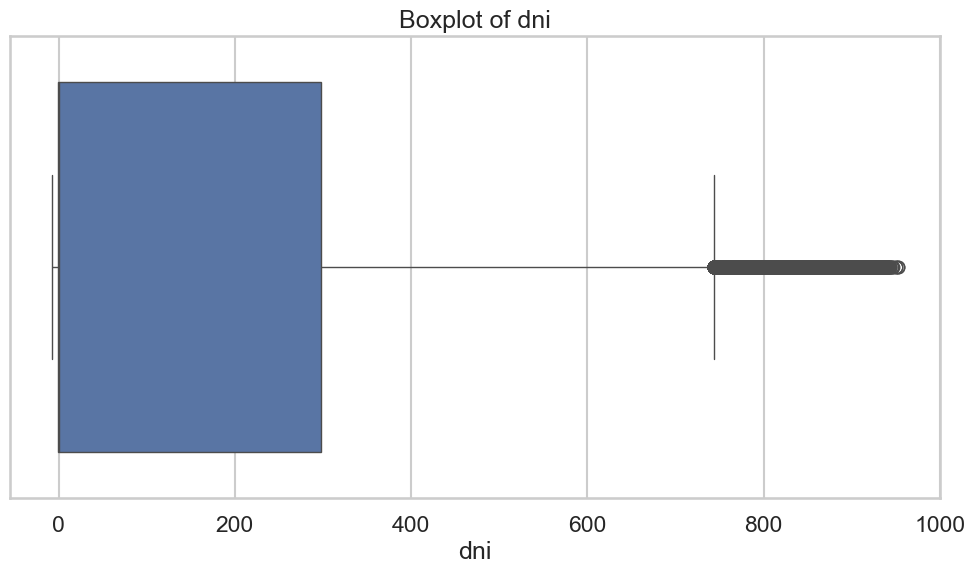

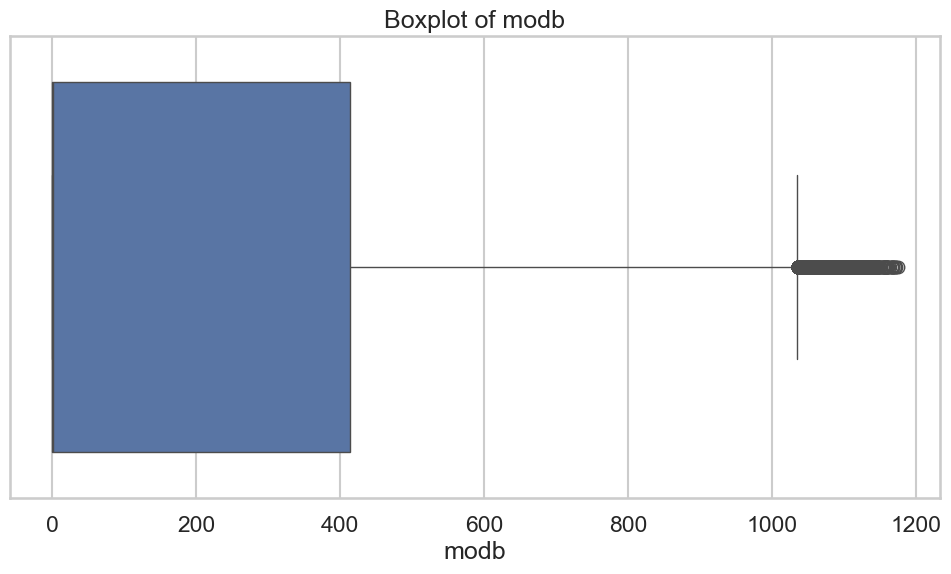

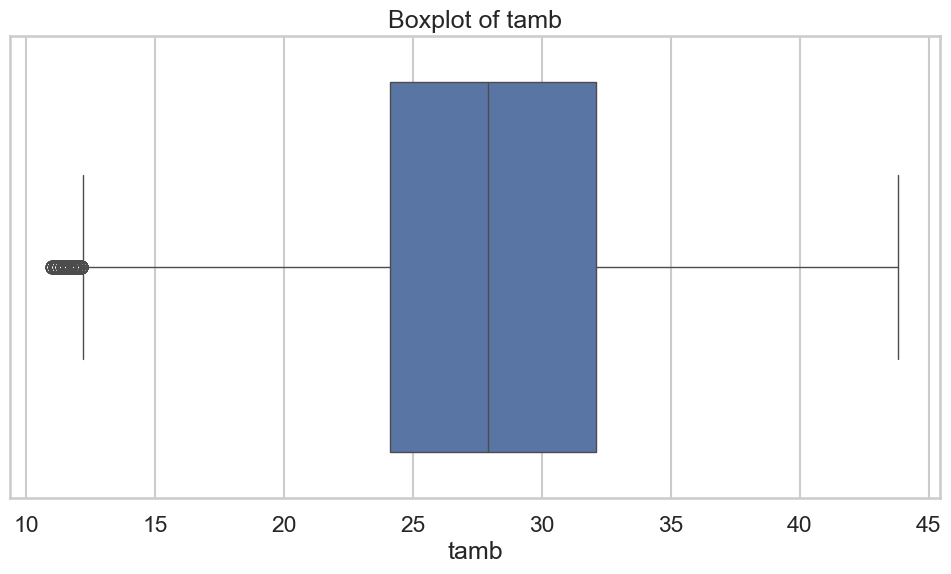

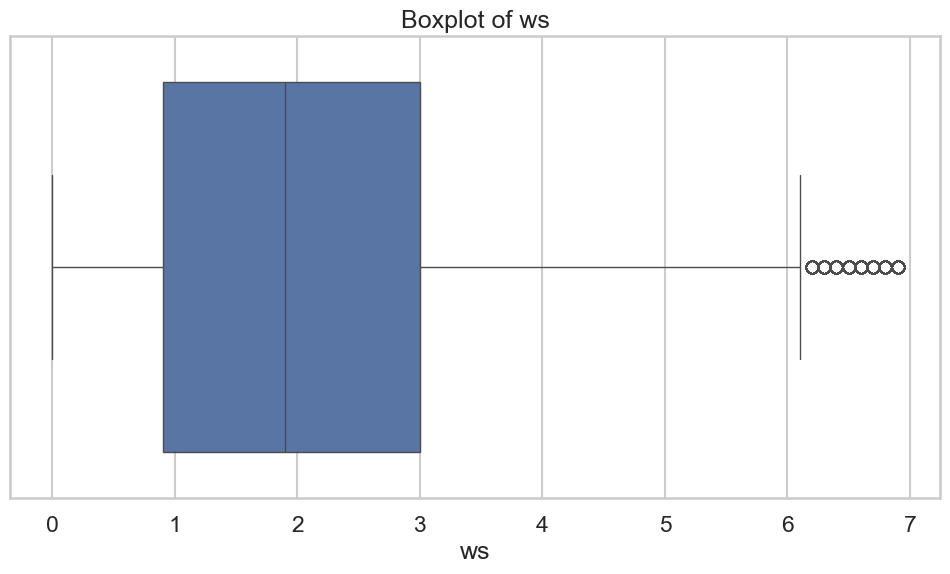

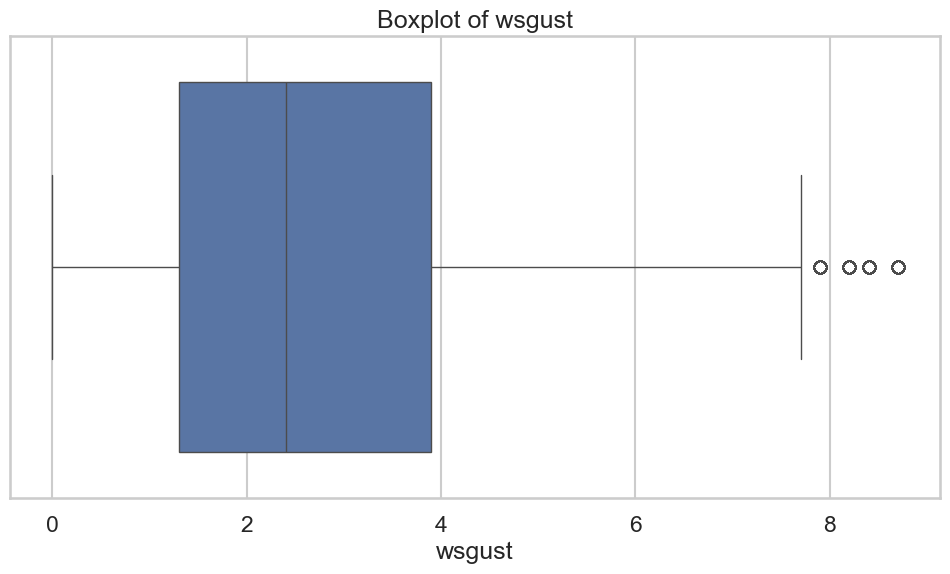

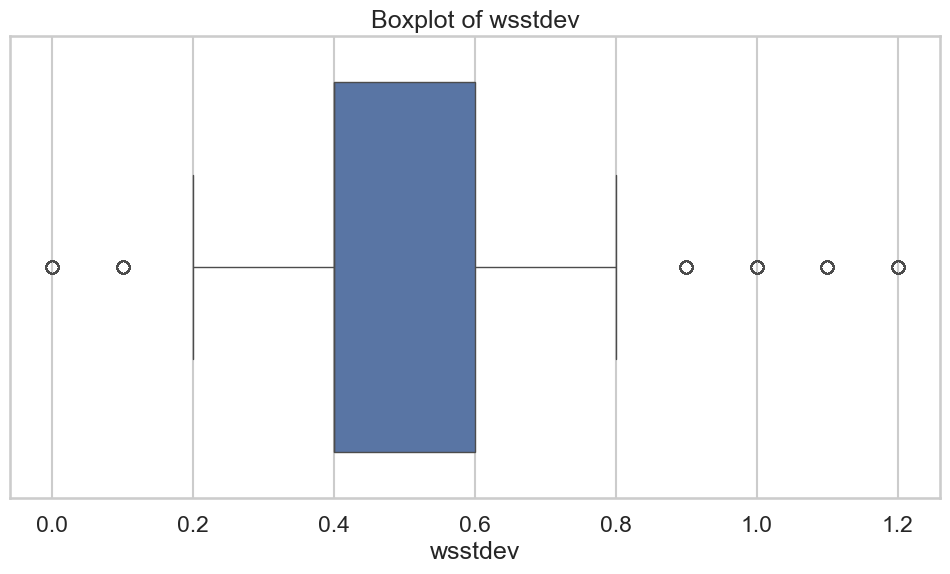

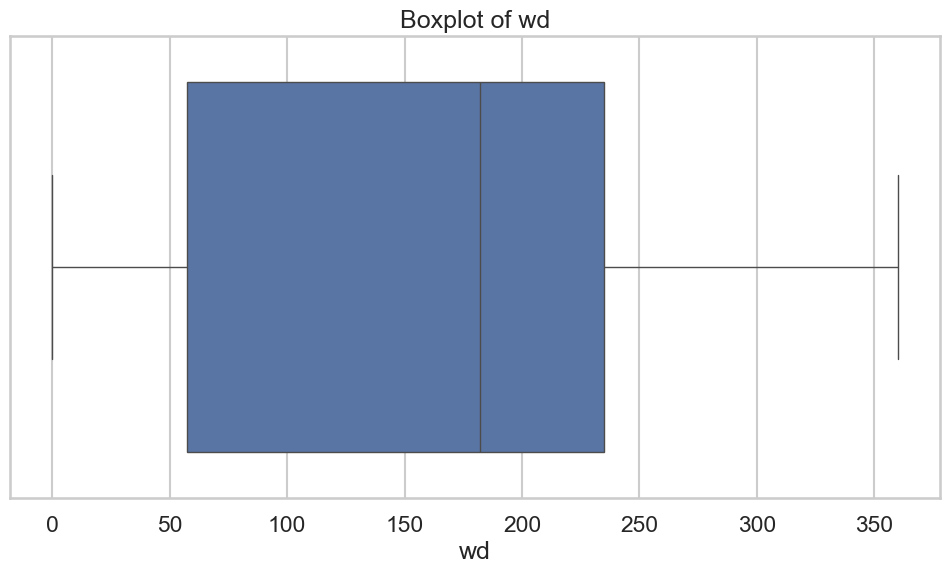

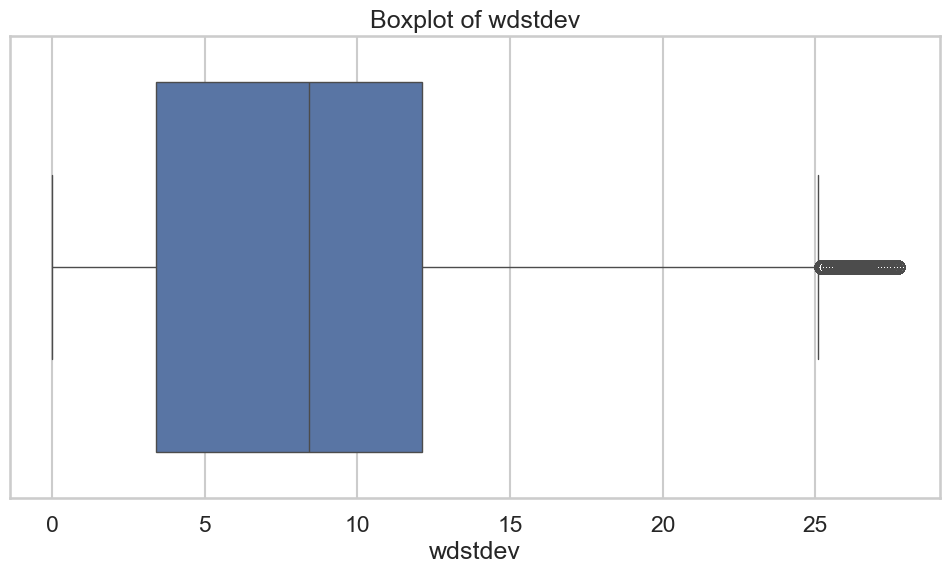

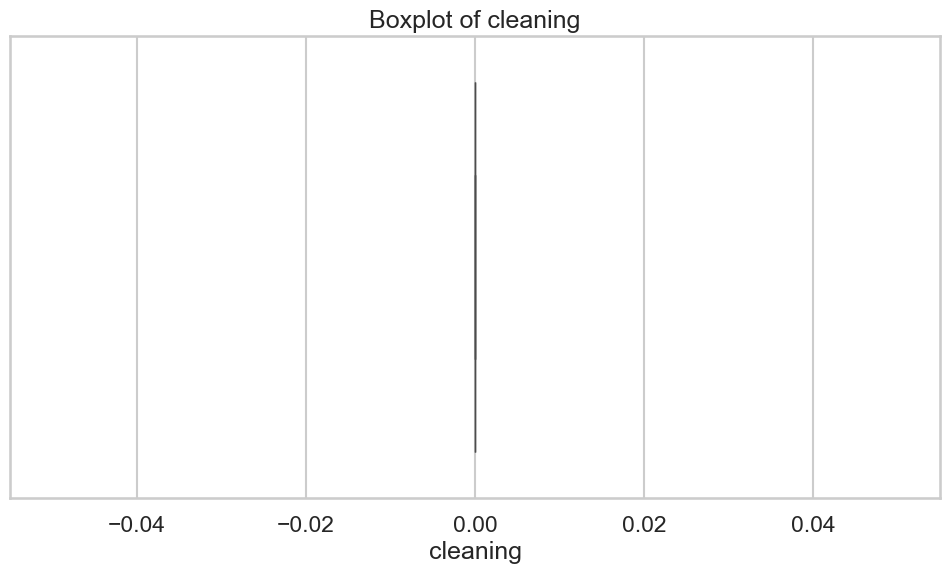

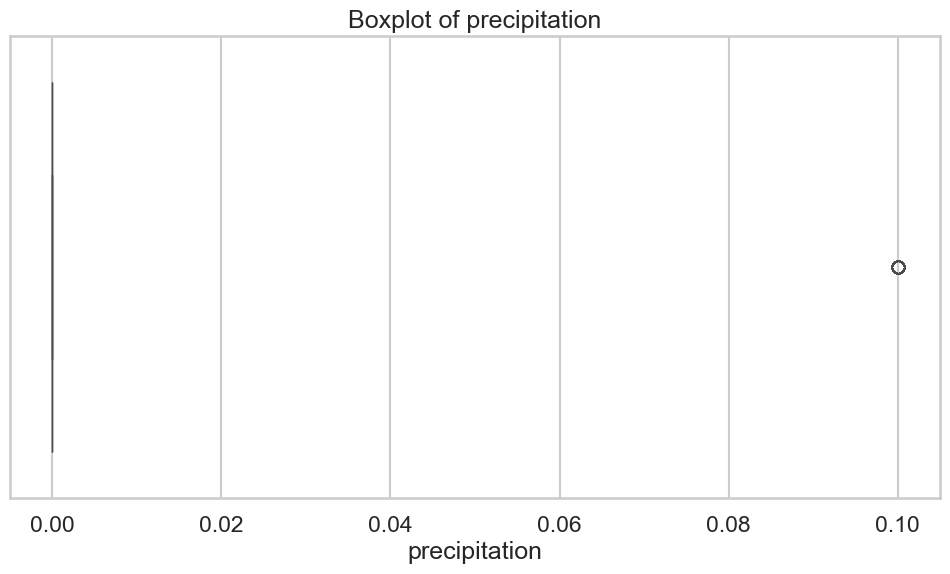

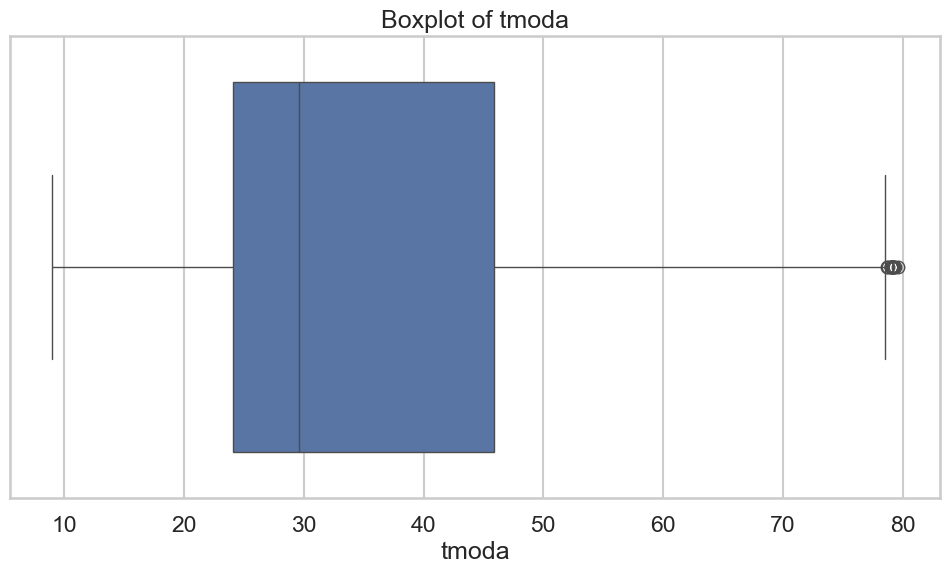

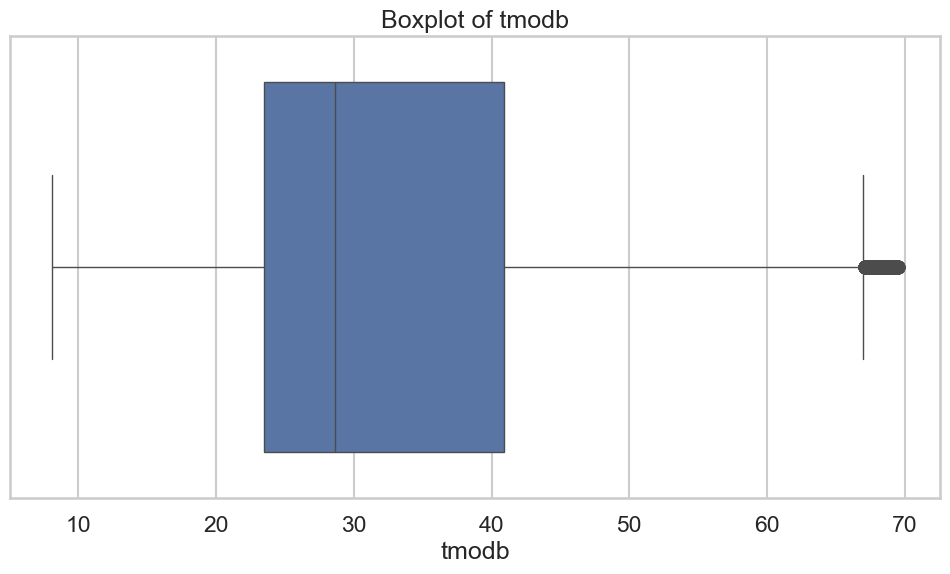

In [29]:
for c in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[c])
    plt.title(f"Boxplot of {c}")
    plt.show()

## Boxplot Summary – Interpretation

- Boxplots provide a visual summary of the distribution, central tendency, and variability of numeric features.
- Each plot displays the median (central line), interquartile range (IQR) (the box), and potential outliers (points beyond whiskers).
- The whiskers represent the range within 1.5 times the IQR from the lower and upper quartiles.
- Outliers are shown as individual points, indicating values significantly different from the majority.

### **General Observations**:
- Features such as GHI, DNI, and DHI show wide variability and multiple outliers, reflecting fluctuating solar conditions.
- Temperature-related features (MODA, MODB, TAMB, TMODA) exhibit moderate spread, with some high-value outliers due to peak heat exposure.
- Wind-related variables (WS, WSGUST, WSSTDDEV) display skewed distributions and occasional extreme values.
- Precipitation and Cleaning are sparse and binary-like, often showing limited variation or clustered values.

## 🔢 Cell 16: Categorical Feature Counts

In [ ]:
cat_cols = df.select_dtypes(exclude=np.number).columns
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns: {list(cat_cols)}")

if len(cat_cols) == 0:
    print("No categorical columns found - this might be the issue")
else:
    for c in cat_cols:
        print(f"\nColumn: {c}")
        print(f"Data type: {df[c].dtype}")
        print(f"Unique values: {df[c].nunique()}")
        print(f"Sample values: {df[c].unique()[:5]}")

## 📏 Cell 17: Correlation with Target (if any)

In [ ]:
target = None 
if target and target in df.columns:
    corr_target = df.corr(numeric_only=True)[target].sort_values(ascending=False)
    print(corr_target)

## 🧠 Cell 18: Skewness & Kurtosis

In [ ]:
df[num_cols].agg(['skew', 'kurtosis']).T

## 🧾 Cell 19: Save Cleaned Data

In [ ]:
df.to_csv('benin-malanville-clean.csv', index=False)
print("✅ Cleaned dataset saved successfully.")

## 📚 Cell 20: Summary

In [ ]:
print("✅ EDA Complete!")
print(f"Final dataset shape: {df.shape}")
print(f"Numeric columns: {len(num_cols)}, Categorical: {len(cat_cols)}")